In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv("./lucas_soil_2018.csv")
df.head()

/var/folders/d5/tjnvwpgj1yddg5dlp5dr9wqr0000gn/T/ipykernel_17633/1167546493.py:1: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./lucas_soil_2018.csv")


,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,Lucas2015,Lucas2018,Coarse,Clay,Sand,Silt,PSDAvailable,TextureFromSurvey,USDA,ISSS
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3,< LOD,1.1,101.9,...,YES,YES,2.0,23.0,23.0,54.0,Yes,2009.0,silt loam,silty loam
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1,< LOD,1.3,51.2,...,YES,YES,6.0,15.0,47.0,38.0,Yes,2009.0,loam,silty loam
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1,12.3,3.1,114.8,...,YES,YES,4.0,23.0,11.0,66.0,Yes,2009.0,silt loam,silty loam
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3,< LOD,2,165.8,...,NO,YES,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2,< LOD,2.2,42.1,...,NO,YES,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN


In [115]:
df.columns

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N',
       'K', 'OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_0_x',
       'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'SURVEY_DATE',
       'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'NUTS_0_y',
       'Lucas2009', 'Lucas2012', 'Lucas2015', 'Lucas2018', 'Coarse', 'Clay',
       'Sand', 'Silt', 'PSDAvailable', 'TextureFromSurvey', 'USDA', 'ISSS'],
      dtype='object')

In [116]:
df.drop(
    columns=["Lucas2009", "Lucas2015", "Lucas2012", "Lucas2012", "Lucas2018"],
    inplace=True,
)
df.drop(columns=["TextureFromSurvey", "PSDAvailable", "NUTS_0_y"], inplace=True)

df.drop(columns=["SURVEY_DATE"], inplace=True)
df["NUTS_0"] = df["NUTS_0_x"]
df.drop(columns=["NUTS_0_x"], inplace=True)

df.drop(columns=["POINTID"], inplace=True)
df.drop(columns=["TH_LAT", "TH_LONG"], inplace=True)

print(df.columns)

Index(['Depth', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K',
       'OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_1',
       'NUTS_2', 'NUTS_3', 'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc',
       'LU1_Desc', 'Coarse', 'Clay', 'Sand', 'Silt', 'USDA', 'ISSS', 'NUTS_0'],
      dtype='object')


In [117]:
df.replace("< LOD", np.nan, inplace=True)
df.replace("<  LOD", np.nan, inplace=True)
df.replace("<0.0", np.nan, inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18984 entries, 0 to 18983
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Depth             18984 non-null  object 
 1   pH_CaCl2          18983 non-null  float64
 2   pH_H2O            18983 non-null  float64
 3   EC                18975 non-null  float64
 4   OC                18949 non-null  object 
 5   CaCO3             11212 non-null  object 
 6   P                 13981 non-null  object 
 7   N                 18969 non-null  object 
 8   K                 18944 non-null  object 
 9   OC (20-30 cm)     140 non-null    object 
 10  CaCO3 (20-30 cm)  14 non-null     float64
 11  Ox_Al             2510 non-null   float64
 12  Ox_Fe             2510 non-null   float64
 13  NUTS_1            18984 non-null  object 
 14  NUTS_2            18984 non-null  object 
 15  NUTS_3            18984 non-null  object 
 16  Elev              18984 non-null  int64 

In [119]:
df["CaCO3"] = df["CaCO3"].astype(float)
df["P"] = df["P"].astype(float)
df["K"] = df["K"].astype(float)
df["N"] = df["N"].astype(float)

In [120]:
df.describe()

,pH_CaCl2,pH_H2O,EC,CaCO3,P,N,K,CaCO3 (20-30 cm),Ox_Al,Ox_Fe,Elev,Coarse,Clay,Sand,Silt
count,18983.000000,18983.000000,18975.000000,11212.000000,13981.000000,18969.000000,18944.000000,14.000000,2510.000000,2510.000000,18984.000000,16275.000000,16728.000000,16728.000000,16728.000000
mean,5.706427,6.259460,18.389964,96.213566,34.721172,3.154605,204.456638,288.857143,1.171474,2.547171,613.188211,15.694869,19.974773,40.965208,39.055655
std,1.398586,1.319465,25.560630,164.632163,27.546879,3.716608,207.069427,236.021139,1.243111,2.431786,1461.681637,12.815397,13.642703,24.887923,17.497355
min,2.600000,3.340000,0.240000,1.000000,0.300000,0.200000,6.200000,1.000000,0.000000,0.100000,-55.000000,1.000000,0.000000,0.000000,0.000000
25%,4.500000,5.120000,8.095000,1.000000,16.600000,1.300000,85.000000,64.500000,0.600000,1.000000,124.000000,6.000000,9.000000,20.000000,26.000000
50%,5.800000,6.290000,13.950000,5.000000,26.500000,2.000000,153.000000,287.500000,0.900000,1.900000,261.000000,12.000000,18.000000,39.000000,39.000000
75%,7.100000,7.500000,20.600000,123.000000,44.000000,3.400000,261.000000,417.750000,1.300000,3.300000,666.250000,21.000000,28.000000,60.000000,51.000000
max,9.800000,10.430000,1295.600000,926.000000,515.000000,46.500000,7578.800000,702.000000,34.700000,35.800000,11464.000000,98.000000,95.000000,100.000000,93.000000


In [121]:
def grab_col_names(data, cat_th=10, car_th=20):
    # Categorical columns and categorical but high-cardinality columns
    cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
    num_but_cat = [
        col
        for col in data.columns
        if data[col].nunique() < cat_th and data[col].dtypes != "O"
    ]
    high_card_cat_cols = [
        col
        for col in data.columns
        if data[col].nunique() > car_th and data[col].dtypes == "O"
    ]

    # Combine Object type columns and Low-unique-value numeric columns into cat_cols
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in high_card_cat_cols]

    # Numerical columns excluding those considered as categorical
    num_cols = [col for col in data.columns if data[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Display information about the dataset
    print(f"Observations: {data.shape[0]}")
    print(f"Variables: {data.shape[1]}")
    print(f"Categorical Columns: {len(cat_cols)}")
    print(f"Numerical Columns: {len(num_cols)}")
    print(f"High Cardinality Categorical Columns: {len(high_card_cat_cols)}")
    print(f"Number but Categorical Columns: {len(num_but_cat)}")
    print("\n")

    return cat_cols, num_cols, high_card_cat_cols


cat_cols, num_cols, high_card_cat_cols = grab_col_names(df)
print(f"Catergorical Columns: {cat_cols}")
print(f"Numerical Columns: {num_cols}")
print(f"High Cardinality Categorical Columns: {high_card_cat_cols}")

Observations: 18984
Variables: 29
Categorical Columns: 4
Numerical Columns: 15
High Cardinality Categorical Columns: 10
Number but Categorical Columns: 0


Catergorical Columns: ['Depth', 'LC0_Desc', 'USDA', 'ISSS']
Numerical Columns: ['pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3', 'P', 'N', 'K', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'Elev', 'Coarse', 'Clay', 'Sand', 'Silt']
High Cardinality Categorical Columns: ['OC', 'OC (20-30 cm)', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC1_Desc', 'LU1_Desc', 'NUTS_0']


In [122]:
print(f"Total number of missing values: {df.isnull().sum().sum()}")

Total number of missing values: 97627


In [123]:
print(f"Number of Duplicate Rows: {df.duplicated().sum()}")

Number of Duplicate Rows: 0


In [124]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

Categorical Columns: ['Depth', 'OC', 'OC (20-30 cm)', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'USDA', 'ISSS', 'NUTS_0']
Numerical Columns: ['pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3', 'P', 'N', 'K', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'Coarse', 'Clay', 'Sand', 'Silt']


In [125]:
def my_headmap(data, size):
    if size:
        plt.figure(figsize=size)
    sns.heatmap(
        data.corr(), annot=True, fmt=".1f", cmap="Blues", annot_kws={"size": 12}
    )
    plt.title("Correlation Matrix")
    plt.show()

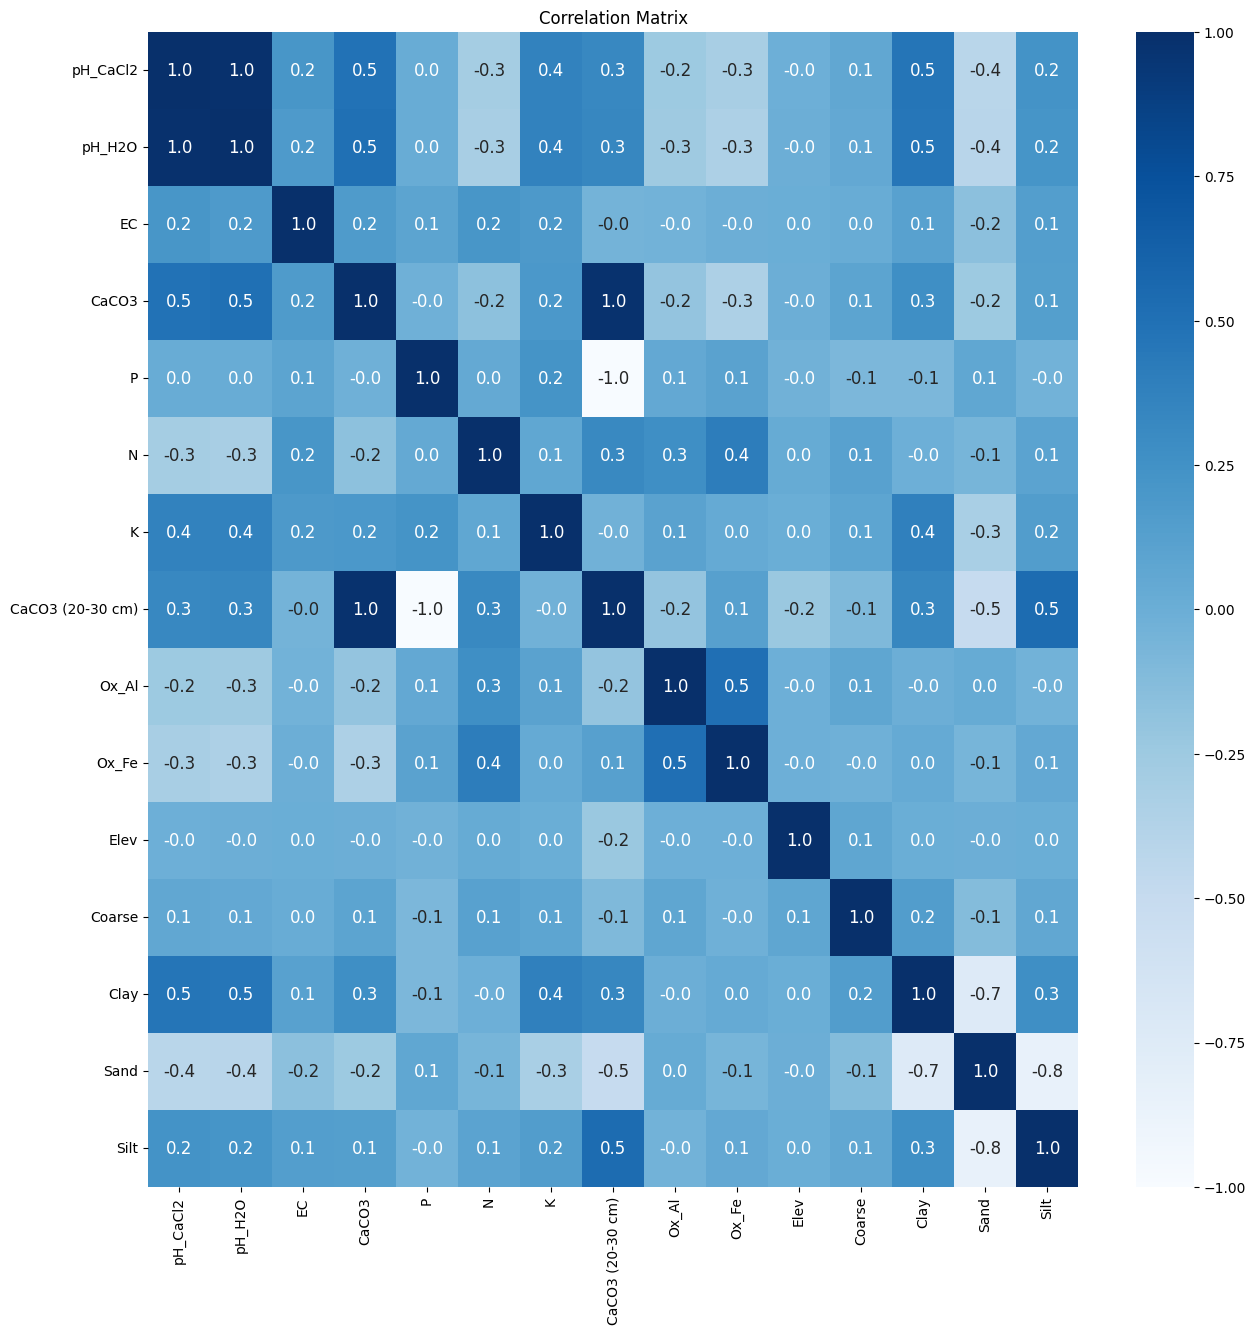

In [126]:
n_numeric_cols = len(numerical_cols)
my_headmap(
    df.select_dtypes(include=[np.number]),
    size=(n_numeric_cols + 1, n_numeric_cols + 1),
)

In [127]:
print(df.isnull().sum())  # Count missing values per column

Depth                   0
pH_CaCl2                1
pH_H2O                  1
EC                      9
OC                     35
CaCO3                7772
P                    5003
N                      15
K                      40
OC (20-30 cm)       18844
CaCO3 (20-30 cm)    18970
Ox_Al               16474
Ox_Fe               16474
NUTS_1                  0
NUTS_2                  0
NUTS_3                  0
Elev                    0
LC                      0
LU                      0
LC0_Desc                0
LC1_Desc                0
LU1_Desc                0
Coarse               2709
Clay                 2256
Sand                 2256
Silt                 2256
USDA                 2256
ISSS                 2256
NUTS_0                  0
dtype: int64


In [128]:
# Missing values percentage
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False)
print("Missing Values Percentage:")
print(missing_percentage)

Missing Values Percentage:
CaCO3 (20-30 cm)    99.926254
OC (20-30 cm)       99.262537
Ox_Fe               86.778340
Ox_Al               86.778340
CaCO3               40.939739
P                   26.353772
Coarse              14.269912
USDA                11.883692
Silt                11.883692
Sand                11.883692
Clay                11.883692
ISSS                11.883692
K                    0.210704
OC                   0.184366
N                    0.079014
EC                   0.047408
pH_H2O               0.005268
pH_CaCl2             0.005268
dtype: float64


In [129]:
def drop_missing_columns(df, threshold=0.8):
    """
    Drops columns from a pandas DataFrame if they have more than a specified percentage of missing values.

    Args:
      df: The pandas DataFrame.
      threshold: The threshold percentage of missing values (e.g., 0.8 for 80%).

    Returns:
      A new pandas DataFrame with the columns dropped.
    """
    missing_percentages = df.isnull().sum() / len(df)
    columns_to_drop = missing_percentages[missing_percentages > threshold].index
    print(columns_to_drop)
    return df.drop(columns=columns_to_drop)


df = drop_missing_columns(df, 0.8)

Index(['OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe'], dtype='object')


In [130]:
print(f"Remaining columns: {df.columns.tolist()}")


# Fillup missing values
def fill_missing_values(data):
    # Fill missing values for numerical columns with the mean
    numeric_cols = data.select_dtypes(include=["float64"]).columns
    numeric_fill = {col: data[col].mean() for col in numeric_cols}
    data.fillna(numeric_fill, inplace=True)

    # Fill missing values for categorical columns with the mode
    categorical_cols = data.select_dtypes(include=["object"]).columns
    categorical_fill = {col: data[col].mode()[0] for col in categorical_cols}
    data.fillna(categorical_fill, inplace=True)

    return data


df = fill_missing_values(df)
print(df.isnull().sum())  # Count missing values per column


Remaining columns: ['Depth', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'Coarse', 'Clay', 'Sand', 'Silt', 'USDA', 'ISSS', 'NUTS_0']
Depth       0
pH_CaCl2    0
pH_H2O      0
EC          0
OC          0
CaCO3       0
P           0
N           0
K           0
NUTS_1      0
NUTS_2      0
NUTS_3      0
Elev        0
LC          0
LU          0
LC0_Desc    0
LC1_Desc    0
LU1_Desc    0
Coarse      0
Clay        0
Sand        0
Silt        0
USDA        0
ISSS        0
NUTS_0      0
dtype: int64


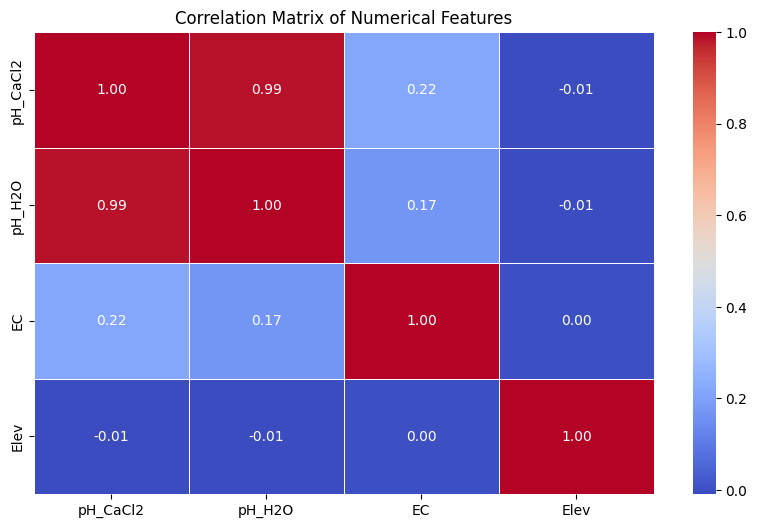

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[["pH_CaCl2", "pH_H2O", "EC", "Elev"]].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [132]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

Categorical Columns: ['Depth', 'OC', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'USDA', 'ISSS', 'NUTS_0']
Numerical Columns: ['pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3', 'P', 'N', 'K', 'Coarse', 'Clay', 'Sand', 'Silt']


In [133]:
# Label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder


def label_encode(data):
    le = LabelEncoder()
    for col in data.select_dtypes(include=["object"]).columns:
        print(f"Encoding {col}...")
        data[col] = le.fit_transform(data[col])
    return data


df = label_encode(df)
print(df.head())

Encoding Depth...
Encoding OC...
Encoding NUTS_1...
Encoding NUTS_2...
Encoding NUTS_3...
Encoding LC...
Encoding LU...
Encoding LC0_Desc...
Encoding LC1_Desc...
Encoding LU1_Desc...
Encoding USDA...
Encoding ISSS...
Encoding NUTS_0...
   Depth  pH_CaCl2  pH_H2O     EC    OC  CaCO3          P    N      K  NUTS_1  \
0      1       4.1    4.81   8.73   186    3.0  34.721172  1.1  101.9       0   
1      1       4.1    4.93   5.06   455    1.0  34.721172  1.3   51.2       0   
2      1       4.1    4.85  12.53  1533    1.0  12.300000  3.1  114.8       0   
3      1       5.5    5.80  21.10   932    3.0  34.721172  2.0  165.8       0   
4      1       6.1    6.48  10.89   605    2.0  34.721172  2.2   42.1       0   

   ...  LC0_Desc  LC1_Desc  LU1_Desc     Coarse       Clay       Sand  \
0  ...         7        32        12   2.000000  23.000000  23.000000   
1  ...         7        55        12   6.000000  15.000000  47.000000   
2  ...         7        36        12   4.000000  23.000000

In [134]:
# Scale numerical features
from sklearn.preprocessing import MinMaxScaler, StandardScaler


def minmax_scale(data):
    scaler = MinMaxScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return scaled_data


def scale_data(data):
    scaler = StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return scaled_data


# Scale numerical features
df = scale_data(df)
print(df.head())

      Depth  pH_CaCl2    pH_H2O        EC        OC     CaCO3             P  \
0  0.103444 -1.148668 -1.098578 -0.378023 -1.207302 -0.736777 -3.005786e-16   
1  0.103444 -1.148668 -1.007628 -0.521641 -0.803656 -0.752585 -3.005786e-16   
2  0.103444 -1.148668 -1.068261 -0.229318  0.813927 -0.752585 -9.484756e-01   
3  0.103444 -0.147605 -0.348235  0.106052 -0.087898 -0.736777 -3.005786e-16   
4  0.103444  0.281423  0.167153 -0.293496 -0.578575 -0.744681 -3.005786e-16   

          N         K    NUTS_1  ...  LC0_Desc  LC1_Desc  LU1_Desc  \
0 -0.553050 -0.495812 -1.958413  ...   1.40283  0.256961  0.784458   
1 -0.499215 -0.740923 -1.958413  ...   1.40283  1.380947  0.784458   
2 -0.014698 -0.433447 -1.958413  ...   1.40283  0.452437  0.784458   
3 -0.310792 -0.186886 -1.958413  ...   1.40283  0.745651  0.784458   
4 -0.256957 -0.784917 -1.958413  ...   1.40283  0.745651  0.784458   

         Coarse      Clay      Sand      Silt      USDA      ISSS   NUTS_0  
0 -1.154177e+00  0.236234 -

In [135]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = df.drop(columns=["pH_H2O", "pH_CaCl2"])
y = df["pH_H2O"]
print("Features shape:", X.shape)
print("Target shape:", y.shape)
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Features shape: (18984, 23)
Target shape: (18984,)
X_train shape: (15187, 23)
X_test shape: (3797, 23)
y_train shape: (15187,)
y_test shape: (3797,)


In [136]:
from keras.api.models import Sequential
from keras.api.layers import Dense, Input, Dropout, BatchNormalization
from keras.api.optimizers import Adam, RMSprop
from keras.api.callbacks import EarlyStopping

num_features = X_train.shape[1]
print(f"Number of features: {num_features}")

# callbacks
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# Define MLP model
model = Sequential(
    [
        Dense(
            256,
            activation="relu",
            input_shape=(X_train.shape[1],),
            kernel_regularizer="l2",
        ),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation="relu", kernel_regularizer="l2"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation="relu", kernel_regularizer="l2"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation="linear"),  # Output for regression
    ]
)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
# model.compile(optimizer=RMSprop(learning_rate=0.001), loss="mse", metrics=["mae"])
print(model.summary())

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
)


Number of features: 23


/Users/rafi/.local/share/mise/installs/python/3.12.9/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 256)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,153 (192.00 KB)

 Trainable params: 48,257 (188.50 KB)

 Non-trainable params: 896 (3.50 KB)

None
Epoch 1/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 4.6559 - mae: 1.0448 - val_loss: 2.6262 - val_mae: 0.5614
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.8500 - mae: 0.7430 - val_loss: 1.8558 - val_mae: 0.5497
Epoch 3/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.9275 - mae: 0.6515 - val_loss: 1.3245 - val_mae: 0.5366
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.3675 - mae: 0.6079 - val_loss: 1.0170 - val_mae: 0.5334
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.0535 - mae: 0.5896 - val_loss: 0.8464 - val_mae: 0.5331
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.8611 - mae: 0.5693 - val_loss: 0.7398 - val_mae: 0.5387
Epoch 7/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7799 - mae: 0.5786 - val_loss: 0.6888 - val_mae: 0.5385
Epoch 8/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7287 - mae: 0.5764 - val_loss: 0.6390 - val_mae: 0.5256
Epoch 9/100
190/190 ━━━━━━━━━━━━━━━

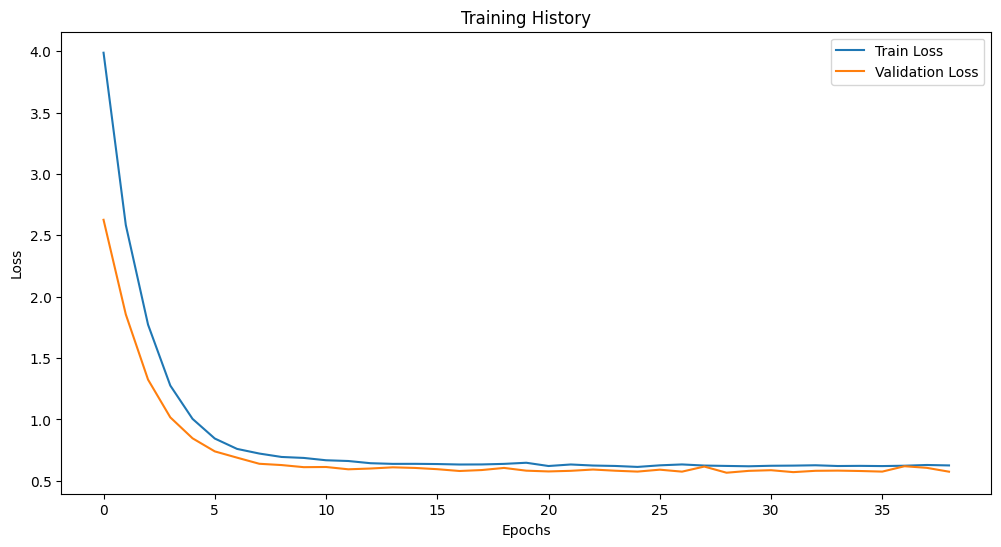

In [137]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5929 - mae: 0.5461
Test Loss: 0.6089, Test MAE: 0.5471
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test RMSE: 0.6836


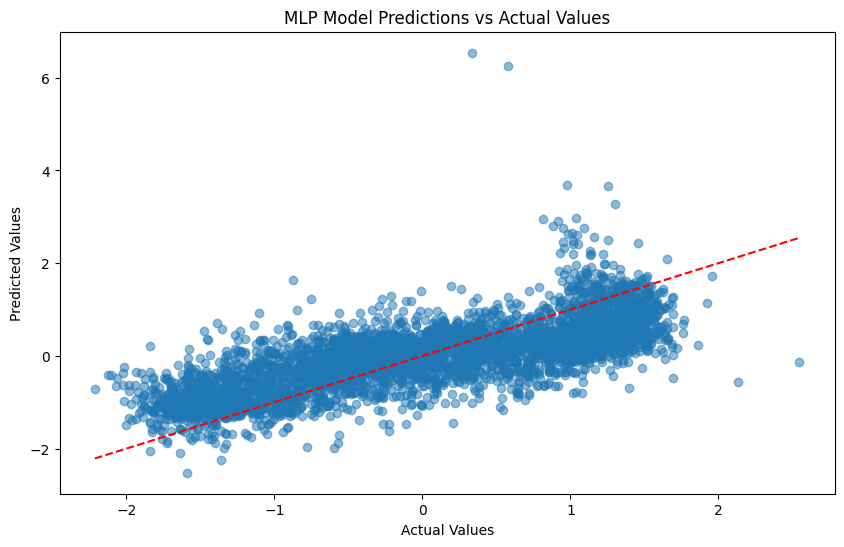

In [138]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")
# Make predictions
y_pred = model.predict(X_test)
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("MLP Model Predictions vs Actual Values")
plt.show()


Model Performance Metrics:
R² Score: 0.5428
Root Mean Square Error: 0.6836
Mean Absolute Error: 0.5471
Explained Variance Score: 0.5428


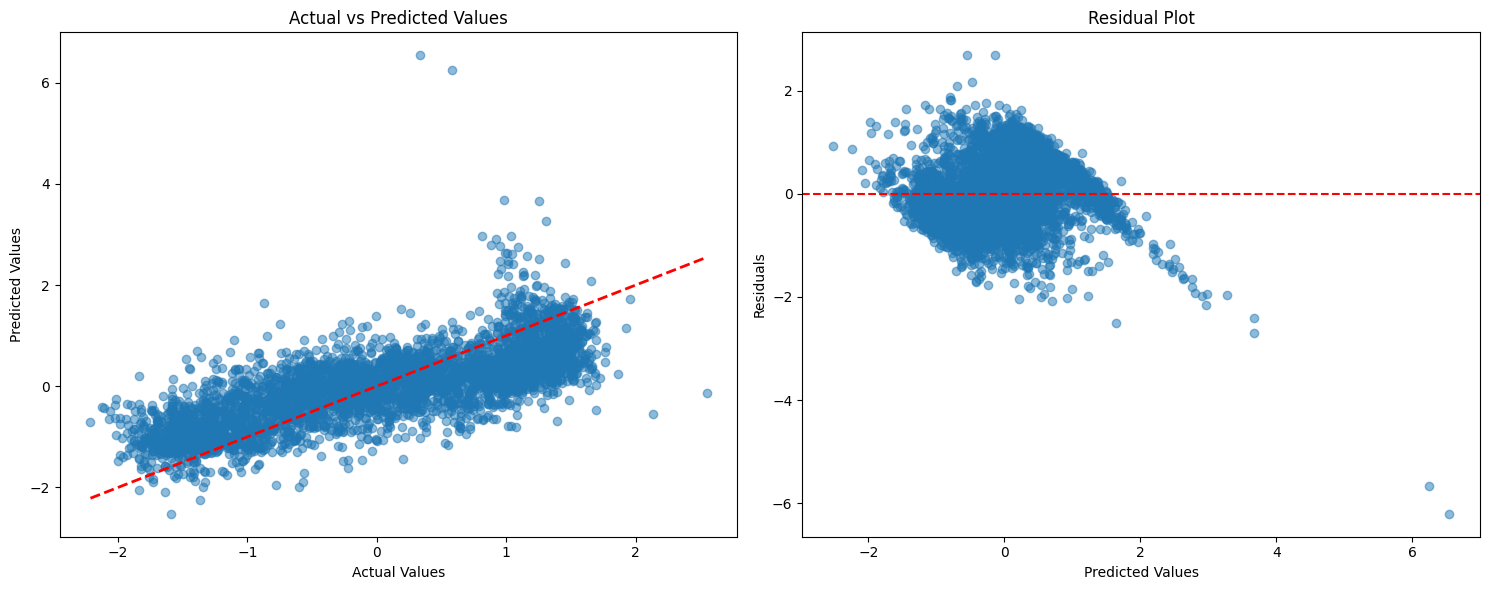

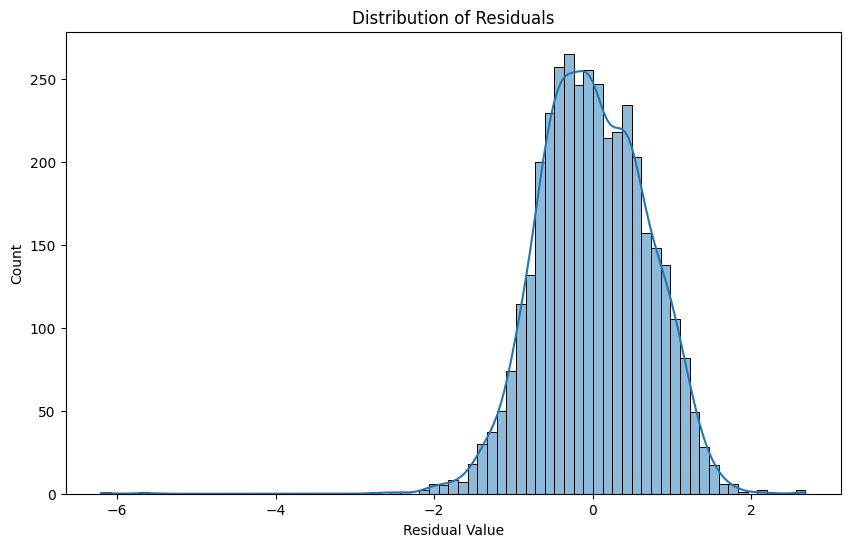

In [139]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    explained_variance_score,
)
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("\nModel Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Square Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Explained Variance Score: {evs:.4f}")

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot of actual vs predicted values
ax1.scatter(y_test, y_pred, alpha=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
ax1.set_xlabel("Actual Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Actual vs Predicted Values")

# Residual plot
residuals = y_test - y_pred.flatten()
ax2.scatter(y_pred.flatten(), residuals, alpha=0.5)
ax2.axhline(y=0, color="r", linestyle="--")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("Residuals")
ax2.set_title("Residual Plot")

plt.tight_layout()
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Count")
plt.show()

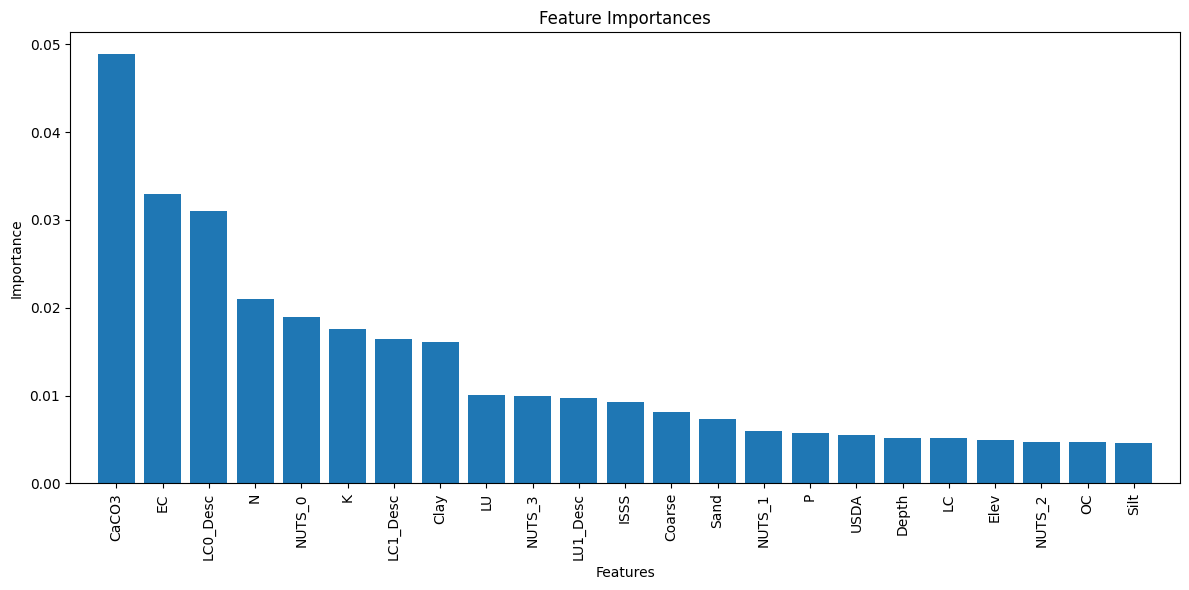

In [140]:
# Feature importance
importances = model.layers[0].get_weights()[0]
importances = np.mean(np.abs(importances), axis=1)
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()